c:\Users\Morten\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


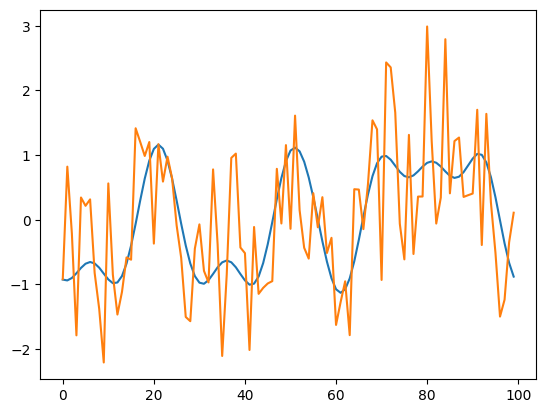

In [17]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy.special import expit, logit, softmax

def der_sigmoid(x):
    return expit(-x) * (1-expit(-x))

sigma = 0
B = 1

T = 1
m = 10
Ts=T/m
ti = np.arange(-4*T,4*T,Ts)
L = 1000
a = (2*np.random.randint(0,2,size=(L))-1)
g_T = (np.cos(2*np.pi*(ti/T)))/(1-(4*(ti/T))**2)


zero = np.zeros(L)
a = np.reshape(a,[L,1])
zero = np.reshape(zero,[L,1])

for i in range(m-1):
    a = np.hstack([a,zero])

v = np.reshape(a,[1,L*(m)])
v = np.convolve(v[0,:],g_T, mode='same')
def func(v,sigma,B,Ts):


    Bf = int(B/(1/Ts/len(v)))
    V = np.fft.fft(v)*Ts
    VLP = np.concatenate((V[0:Bf],np.zeros(len(V)-2*Bf)))
    VLP = np.concatenate((VLP,V[-Bf:]))


    vlp = np.fft.ifft(VLP)/Ts
    r = vlp + sigma*np.random.randn(1,len(vlp))

    return r
r= func(v,1,1,T/m)

plt.plot(v[0:100])
plt.plot(r[0,0:100])

c:\Users\Morten\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


Text(0.5, 1.0, 's')

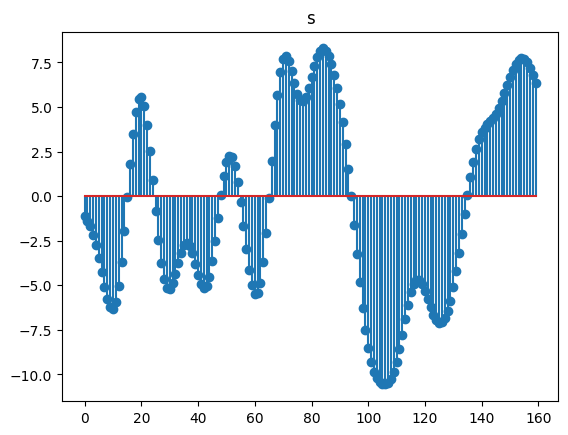

In [18]:
g_T = np.reshape(g_T,[1,len(g_T)])
g_M = np.fliplr(g_T)
g_T = (np.cos(2*np.pi*(ti/T)))/(1-(4*(ti/T))**2)
s = np.convolve(r[0,:],g_M[0,:],mode='same')
plt.stem(s[0:160])
plt.title('s')

[0.] 0.0
[0.] 0.0
[0.] 1.0
[1.] 0.0
[0.] 0.0
[0.] 1.0
[1.] 0.0
0 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
0 0.0
0 0.0
0 0.0
0 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
0 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
0 0.0
0 0.0
0 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
0 1.0
[1.] 1.0
[1.] 0.0
0 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
0 1.0
[1.] 0.0
0 1.0
[1.] 1.0
[1.] 0.0
0 1.0
[1.] 0.0
0 1.0
[1.] 0.0
0 1.0
[1.] 0.0
0 1.0
[1.] 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
0 0.0
0 1.0
[1.] 0.0
0 1.0
[1.] 0.0
0 1.0
[1.] 0.0
0 0.0
0 0.0
0 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
0 1.0
[1.] 1.0
[1.] 0.0
0 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
0 0.0
0 0.0
0 0.0
0 1.0
[1.] 1.0
[1.] 0.0
0 1.0
[1.] 1.0
[1.] 0.0
0 1.0
[1.] 0.0
0 1.0
[1.] 0.0
0 0.0
0 0.0
0 0.0
0 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
0 0.0
0 0.0
0 0.0
0 1.0
[1.] 0.0
0 0.0
0 1.0
[1.] 0.0
0 1.0
[1.] 0.0
0 1.0
[1.] 0.0
0 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
0 0.0
0 0.0
0 1.0
[1.] 0.0
0 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
0 0.0
0 0.0
0 1.0
[1.]

Text(0.5, 0, 'iterations')

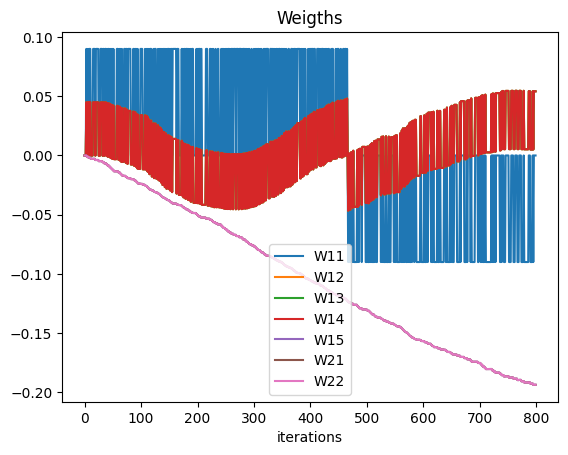

In [19]:
a_hat = np.zeros((len(a[:,0]),))
for i in range(len(a[:,0])):
    a_hat[i] = np.real(r[0,10+(i-1)*m])

data_set = np.vstack((a_hat,a[:,0])).T

percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

eta = 0.09
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0]]).T


W_ji= np.random.normal(0,sigma,(3,2))
W_kj = np.random.normal(0,sigma,(1,4))

t = train_dataset[:,1]
for i in range(len(t)):
    if t[i]==-1:
        t[i] = 0

W1 = []
W2 = []
for i in range(len(x)):
    W1.append(W_kj)
    W2.append(W_ji)
    x_i = x[i].reshape((1,2))

    aj = (W_ji @ x_i[0])
    zj = np.hstack((1,expit(-aj)))

    yk = W_kj@zj
    yk = np.sign(yk)
    if yk == -1:
        yk = 0
    t_calc = yk
    # if yk > 1-yk:
    #     t_calc=1
    # else:
    #     t_calc = 0
    print(t_calc,t[i]) 
    dk = t_calc - t[i]
    dj = (der_sigmoid(zj)*W_kj*dk.T)[:,1:]   

    W_ji = W_ji - eta*dj.T@x_i
    W_kj = W_kj - eta*dk*zj

# x = np.array([np.ones(len(test_dataset)),test_dataset[:,0]]).T
# aj = (W_ji @x.T)
# zj = np.vstack([np.ones(len(aj[0])),(1/(1 + np.exp(aj)))])
# yk = W_kj@zj
# yk = yk[0]
# t_test = []
# for i,input in enumerate(yk):
#     if yk[i] > 1-yk[i]:
#         t_test.append(1)
#     else:
#         t_test.append(0)  

# classification_errors = 0
# t = test_dataset[:,1]
# for i in range(len(t)):
#     if t[i]==-1:
#         t[i] == 0
# for i, classification in enumerate(t):
#     if t_test[i] == classification:
#         # Succes!
#         continue
#     else:
#         classification_errors = classification_errors + 1    

# print(f'The number of classification errors with logistic regression is: {classification_errors}')

W1 = np.array(W1)
W2 = np.array(W2)
W1 = W1[:,0,:]
W2 = W2[:,:,0]
plt.plot(W1)
plt.plot(W2)
plt.title('Weigths')
plt.legend(['W11','W12','W13','W14','W15','W21','W22','W23','W24'],loc=8)
plt.xlabel('iterations')

In [28]:
a_hat = np.zeros((len(a[:,0]),))
for i in range(len(a[:,0])):
    a_hat[i] = np.real(r[0,10+(i-1)*m])

y = np.empty((0,2),dtype=int)
for i in range(len(a[:,0])):
    if a[i,0] == 1:
        y = np.vstack((y,[0,1]))
    else:
        y = np.vstack((y,[1,0]))


data_set = np.vstack((a_hat,y[:,0]))
data_set = np.vstack((data_set,y[:,1])).T

percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

eta = 0.09
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0]]).T


W_ji= np.random.rand(3,2)
W_kj = np.random.rand(2,3)
t = train_dataset[:,1:]
W1 = []
W2 = []
for _ in range(100):
    for i in range(len(x)):
        W1.append(W_kj)
        W2.append(W_ji)
        x_i = x[i].reshape((1,2))

        aj = (W_ji @ x_i[0])
        
        zj = expit(-aj)
        yk = W_kj@zj
        t_calc = softmax(yk)

        dk = np.argmax(t_calc) - np.argmax(t[i])

        dj = (der_sigmoid(zj)*W_kj*dk.T)

        W_ji = W_ji - eta*dj.T@x_i.T
        W_kj = W_kj - eta*dk*zj        
        # dj = (np.dot(W_kj.T,dk)*der_sigmoid(zj))[1:]
        # W_ji = W_ji - eta*dj@x_i.T
        # W_kj = W_kj - eta*np.dot(dk,x_i[0])

print(t_calc)
print(t[-1:])
print(W_ji)
print(W_kj)

[0.5 0.5]
[[0. 1.]]
[[114530.87621617 114531.14931062]
 [102006.12908617 102006.25186457]
 [144579.01697538 144579.29818895]]
[[125.61622702 114.41877383 151.63681632]
 [125.35013938 115.01146203 150.99881292]]


In [26]:
x = np.array([np.ones(len(test_dataset)),test_dataset[:,0]]).T
aj = (W_ji @x.T)
zj = expit(-aj)
yk = W_kj@zj


yk = softmax(yk)
a_result = np.hstack((test_dataset[:,1:],yk.T))

classification_errors = 0
for i, classification in enumerate(test_dataset):
    if np.argmax(yk) == np.argmax(classification):
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1  

print(f'The number of classification errors with logistic regression is: {classification_errors} out of {len(test_dataset)}')



The number of classification errors with logistic regression is: 199 out of 199


In [ ]:
# yk = yk[0]
# t_test = []
# for i,input in enumerate(yk):
#     if yk[i] > 1-yk[i]:
#         t_test.append(1)
#     else:
#         t_test.append(0)  

# classification_errors = 0
# t = test_dataset[:,1]
# for i in range(len(t)):
#     if t[i]==-1:
#         t[i] == 0
# for i, classification in enumerate(t):
#     if t_test[i] == classification:
#         # Succes!
#         continue
#     else:
#         classification_errors = classification_errors + 1    
